<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-580907-1694711866/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

**Import Modules**

---



In [1]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!unzip iris.zip
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle







Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 4.94MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [2]:
!pip install kaggle



---

**Load the Datasets**

---






In [3]:
import pandas as pd
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_data['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64



---


**Preprocessing Dataset**

---





In [7]:
print(iris_data.isnull().sum())
print(iris_data.dtypes)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object




---
**Data Analysis**


---




In [8]:
print(iris_data.shape)
print(iris_data.info())
print(iris_data.head())


(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


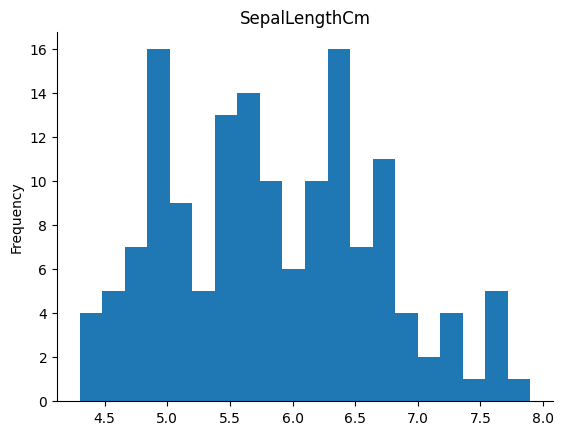

In [ ]:
# @title SepalLengthCm

from matplotlib import pyplot as plt
iris_data['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

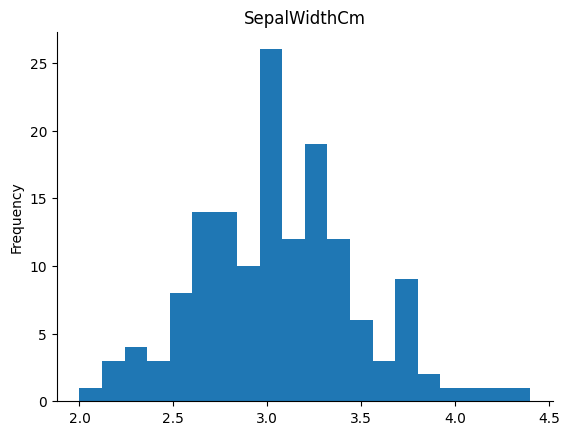

In [ ]:
# @title SepalWidthCm

from matplotlib import pyplot as plt
iris_data['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

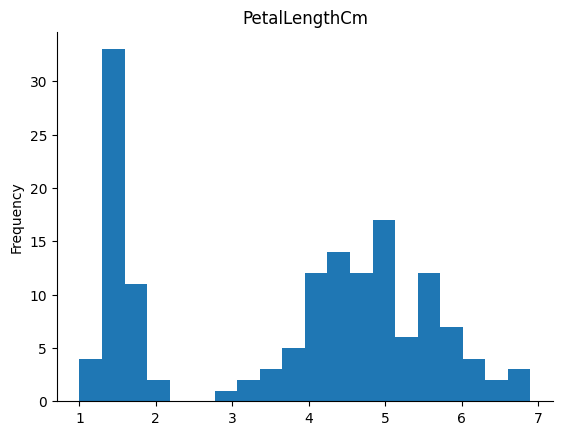

In [ ]:
# @title PetalLengthCm

from matplotlib import pyplot as plt
iris_data['PetalLengthCm'].plot(kind='hist', bins=20, title='PetalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
colors = ['red','orange','blue' ]
species = ['virginica','versicolor','setosa']

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


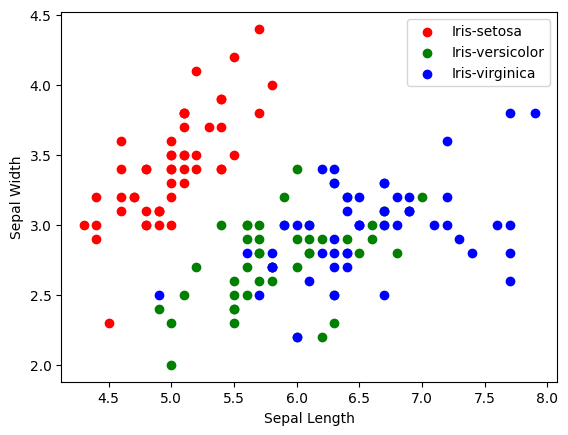

In [10]:
import matplotlib.pyplot as plt
print(iris_data.columns)
species = iris_data['Species'].unique()
colors = ['r', 'g', 'b']
for i in range(len(species)):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()


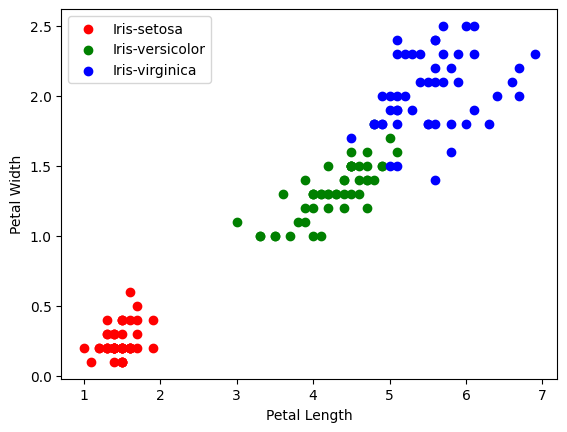

In [11]:
import matplotlib.pyplot as plt
species = iris_data['Species'].unique()
colors = ['r', 'g', 'b']
for i in range(len(species)):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()




---
**Correlation Matrix**


---



                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


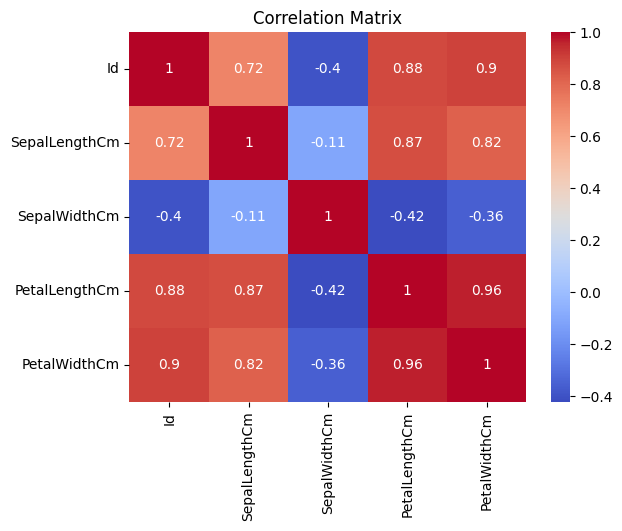

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = iris_data.drop(columns=['Species']).corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




---
**Label Encoder**


---



In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])




---
**Model training and testing**


---



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = iris_data.drop(columns =['Species'])
y = iris_data['Species']



In [ ]:
model.fit(X_train.values, y_train.values)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


LogisticRegression()

In [ ]:
print(" Accuracy: ", model.score(X_test, y_test) * 100)


 Accuracy:  100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  feature names of data provided when reset was last True.


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", accuracy * 100)


K-nearest neighbors Accuracy:  100.0


In [ ]:
model.fit(X_train.values, y_train.values)


KNeighborsClassifier()

In [ ]:
print(" Accuracy: ", model.score(X_test, y_test) * 100)


 Accuracy:  100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  feature names of data provided when reset was last True.


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train.values, y_train.values)
print("Decison Tree Accuracy: ", accuracy * 100)


Decison Tree Accuracy:  100.0


In [ ]:
model.fit(X_train.values, y_train.values)


DecisionTreeClassifier()

In [ ]:
print(" Accuracy: ", model.score(X_test, y_test) * 100)


 Accuracy:  96.66666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  feature names of data provided when reset was last True.


In [ ]:
import pickle
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle

In [ ]:
filename = 'saved_model.sav'
try:
  with open(filename, 'wb') as file:
    pickle.dump(model,file)
  print("Model saved successfully.")
except Exception as e:
  print(f"Error saving the model: {e}")


Model saved successfully.


In [ ]:
load_model = pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[6,2,4,1,3]])

array([0])

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
X_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,20,5.1,3.8,1.5,0.3
50,51,7.0,3.2,4.7,1.4
12,13,4.8,3.0,1.4,0.1
123,124,6.3,2.7,4.9,1.8
46,47,5.1,3.8,1.6,0.2
